# Introduction to Clustering
A Summary of lecture "Cluster Analysis in Python", via [datacamp](https://learn.datacamp.com/courses/cluster-analysis-in-python?embedded=true#!)

This notebook is a basic summary of some of the different examples from the lectures

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Unsupervised learning: basics
- What is unsupervised learning?
    - A group of machine learning algorithm that find patterns in data
    - Data for algorithms has not been labeled, classified or characterized
    - The objective of the algorithm is to interpret any structure in the data
    - Common unsupervised learning algorithms : Clustering, neural network, anomaly detection
- What is clustering?
    - The process of grouping items with similar characteristics
    - Items in groups similar to each other than in other groups
    - Example: distance between points on a 2D plane

### Pokémon sightings
There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be.

In [2]:
# Create x,y coordinate arrays
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

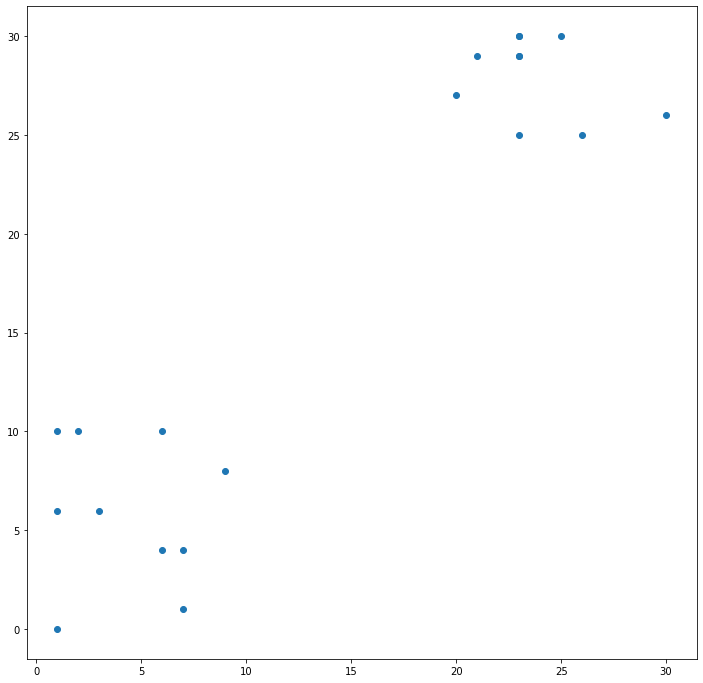

In [3]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(x, y)

## Basics of cluster analysis
- What is a cluster?
    - A group of items with similar characteristics
    - Google News: articles where similar words and word associations appear together
    - Customer Segments
- Clustering Algorithms
    - Hierarchical Clustering
    - K-means Clustering
    - Other clustering algorithms: DBSCAN, Gaussian Methods

### Pokémon sightings: hierarchical clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

In [4]:
# Create a dataframe using the x and y arrays above
df = pd.DataFrame({'x': x, 'y': y})

In [5]:
# Import dependencies
from scipy.cluster.hierarchy import linkage, fcluster

<AxesSubplot:xlabel='x', ylabel='y'>

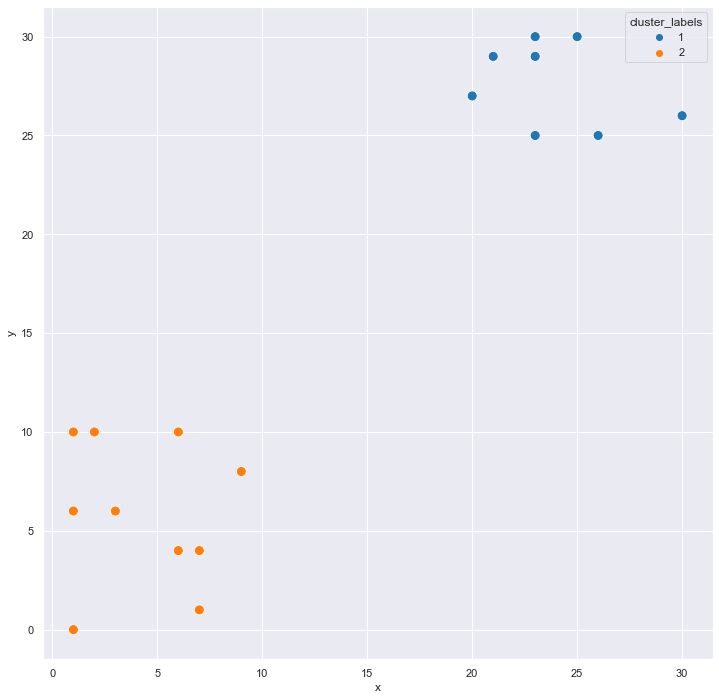

In [6]:
# Use the linkage() to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Set seaborn theme and figure size
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,12))

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df, s=100, palette='tab10')

### Pokémon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

In [7]:
# Import dependencies
from scipy.cluster.vq import kmeans, vq

In [8]:
# Cast the dataframe as floats 
df = df.astype('float')

# Compute cluster centers
centroids, _ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

<AxesSubplot:xlabel='x', ylabel='y'>

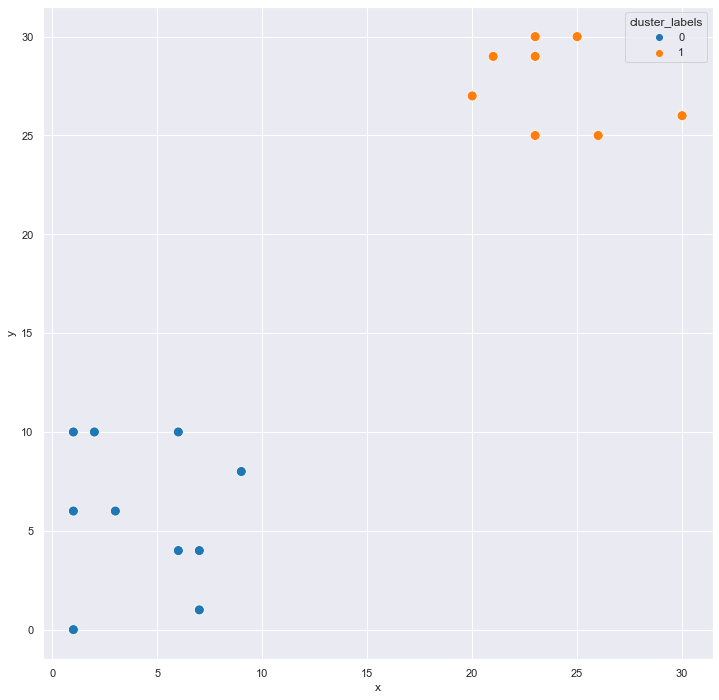

In [9]:
# Plot the points with seaborn
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df, s=100,  palette='tab10')

## Data preparation for cluster analysis
- Why do we need to prepare data for clustering?
    - Variables have incomparable units
    - Variables with same units have vastly different scales and variances
    - Data in raw form may lead to bias in clustering
    - Clusters may be heavily dependent on one variable
    - Solution: normalization of individual variables

### Normalize basic list data
Now that you are aware of normalization, let us try to normalize some data. ```goals_for``` is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the ```whiten()``` function.

In [10]:
# Import dependencies
from scipy.cluster.vq import whiten

In [11]:
# Create array of data
goals_for = [4, 3, 2, 3, 1, 1, 2, 0, 1, 4]

In [12]:
# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


### Visualize normalized data
After normalizing your data, you can compare the scaled data to the original data to see the difference.

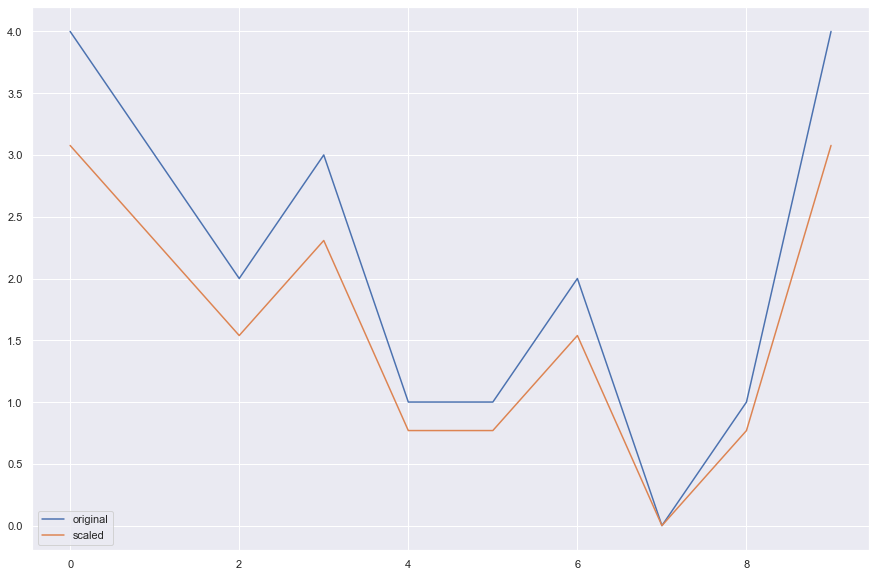

In [13]:
# Plot data
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(goals_for, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()

### Normalization of small numbers
In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years.

In [14]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

In [15]:
# use the whiten() to standardize the data
scaled_data = whiten(rate_cuts)

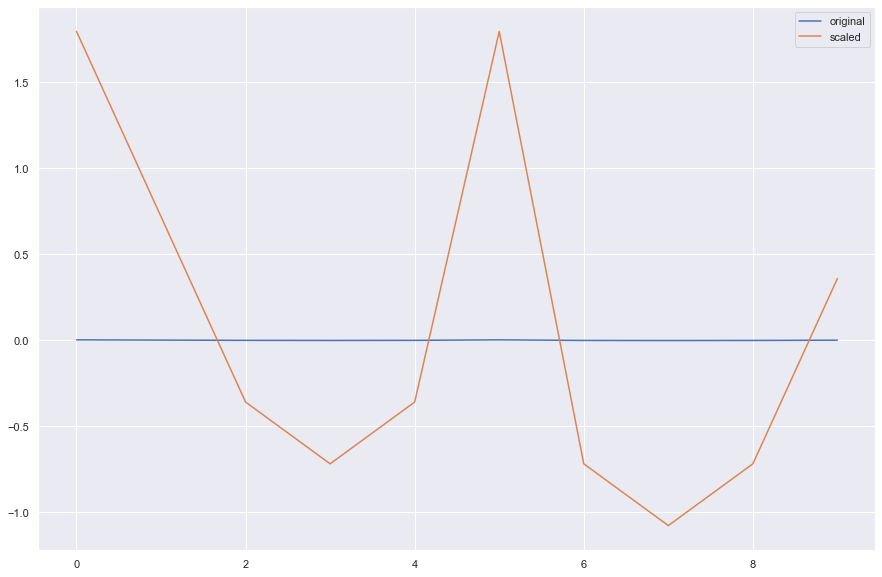

In [16]:
# Plot the data
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(rate_cuts, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()

Notice how the changes in the original data are negligible as compared to the scaled data

## Basics of hierarchical clustering
- Creating a distance matrix using linkage
    - ```method```: how to calculate the proximity of clusters
    - ```metric```: distance metric
    - ```optimal_ordering```: order data points
- Type of Methods
    - single: based on two closest objects
    - complete: based on two farthest objects
    - average: based on the arithmetic mean of all objects
    - centroids: based on the geometric mean of all objects
    - median: based on the median of all objects
    - ward: based on the sum of squares

### Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

In [17]:
comic_con = pd.read_csv('./data/comic_con.csv')
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [18]:
# Import dependencies - whiten method 
from scipy.cluster.vq import whiten

In [19]:
# Create scaled variables using whiten method

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

In [20]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

In [21]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric = 'euclidean')

In [22]:
# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

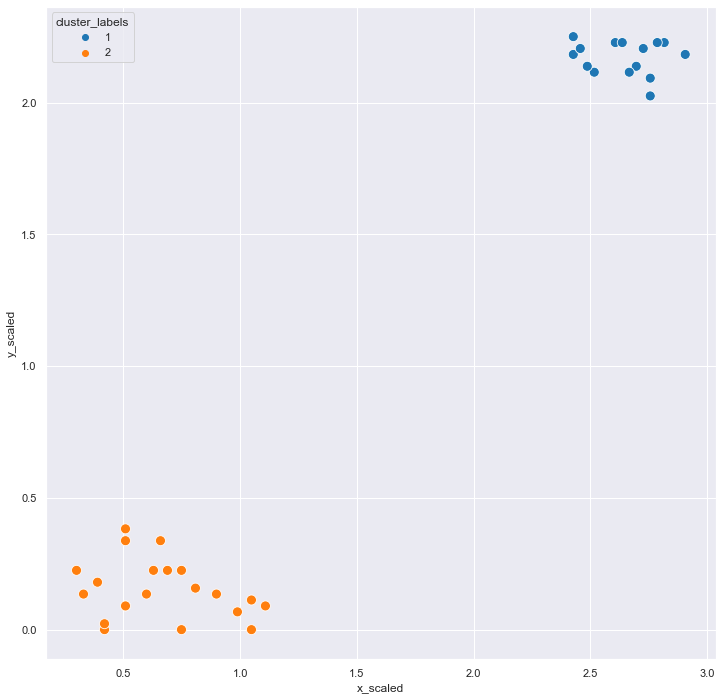

In [23]:
# Plot clusters
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con, s=100, palette='tab10')

### Hierarchical clustering: single method
Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

In [24]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='single', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

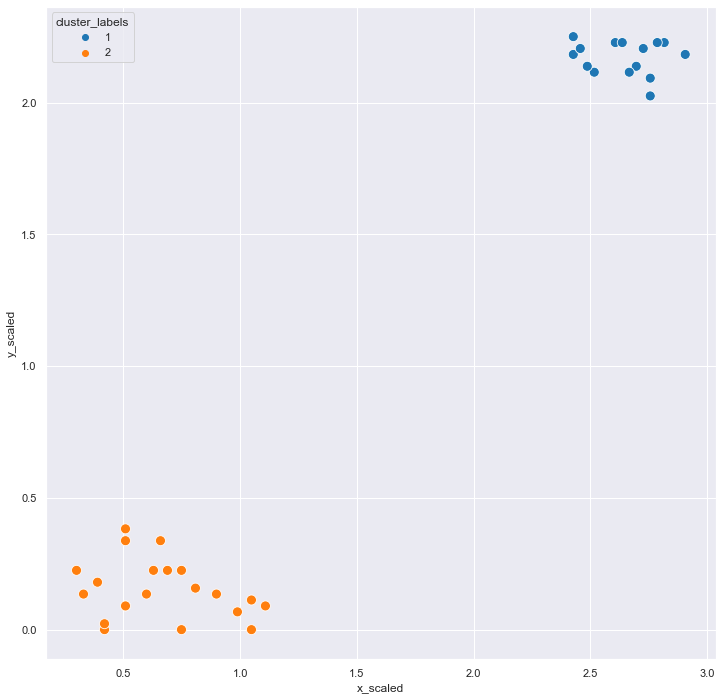

In [25]:
# Plot clusters
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con, s=100, palette='tab10')

The clusters generated using the 'single' method instead of the 'ward' method appear to be the same.

### Hierarchical clustering: complete method
For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

In [26]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

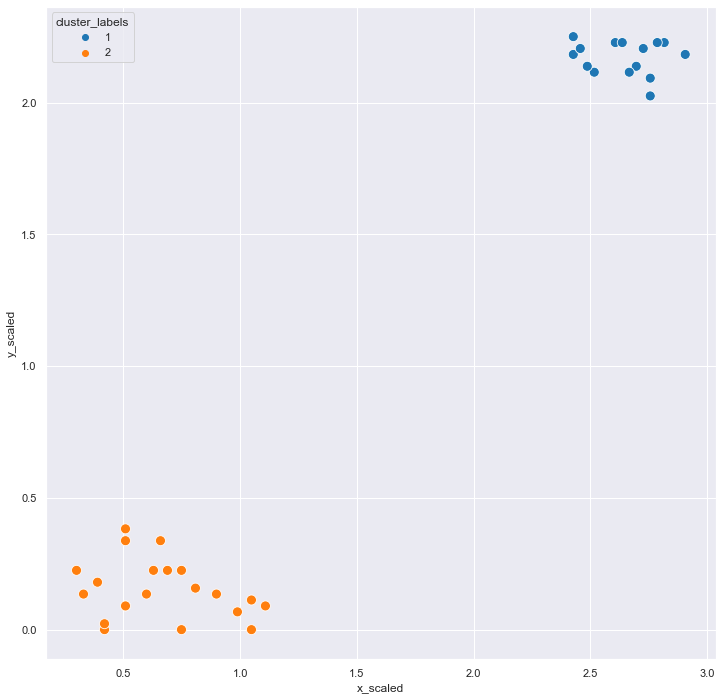

In [27]:
# Plot clusters
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con, s=100, palette='tab10')

The clusters generated using the 'complete' method are the same as those generated by the 'single' and 'ward' methods

## Visualize clusters with matplotlib

In [28]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

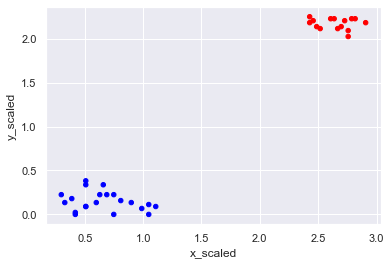

In [36]:
# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                       y='y_scaled',
                       c=comic_con['cluster_labels'].apply(lambda x : colors[x]))

## Visualize clusters with seaborn (much easier)

<AxesSubplot:xlabel='x_scaled', ylabel='y_scaled'>

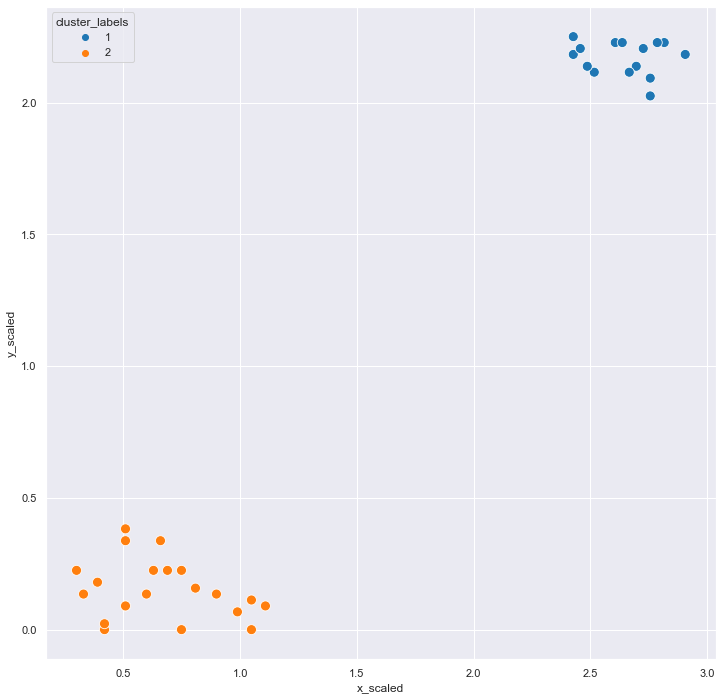

In [37]:
# Plot a scatter plot using seaborn
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con,
               palette='tab10',
               s=100)

## Create a dendrogram

In [38]:
# Import dependencies
from scipy.cluster.hierarchy import dendrogram

In [39]:
# Create distance matrix using linkage 
distance_matrix = linkage(comic_con[['x_scaled','y_scaled']],
                         method='ward',
                         metric='euclidean')

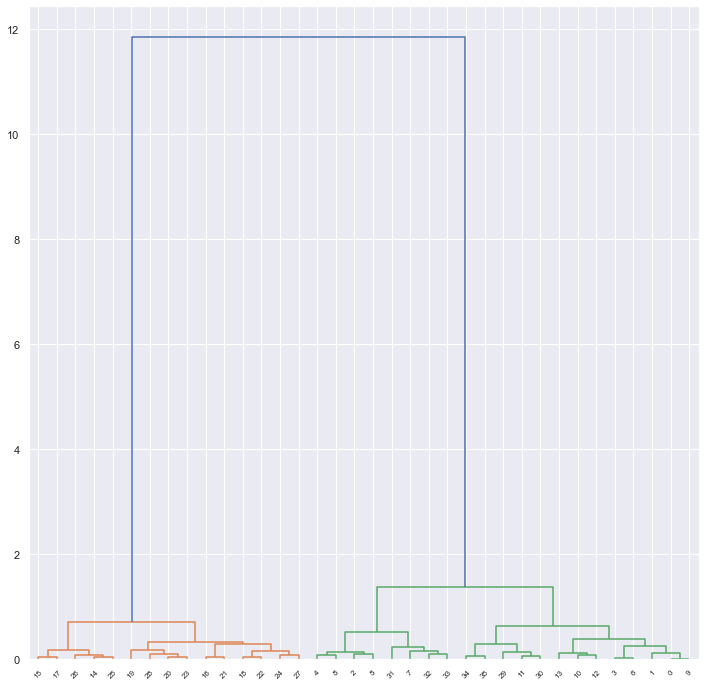

In [41]:
# Create a dendrogram
fig, ax = plt.subplots(figsize=(12,12))
dn = dendrogram(distance_matrix)